# 第6章　ライブラリの利用方法
この章では、ファイル操作について説明し、その後、科学計算やデータ処理を効率的に行うためのライブラリ「NumPy」と、棒グラフ・円グラフ・散布図・折れ線グラフなどのグラフを作成できる「Matplotlib」の使い方について解説する。

## 6.1　ファイル処理

### 6.1.3　ファイルの読み込み

In [ ]:
with open("/content/drive/MyDrive/test.csv", encoding = "shift_jis") as f:
    s = f.read()
    print(s)

山田,123-4567,新宿区,03-123-4567 
鈴木,343-7654,川越市,090-5555-4567 
佐々木,273-0012,船橋市,045-678-1234



### 6.1.4　ファイルへの出力

In [ ]:
with open("/content/drive/MyDrive/test.csv", encoding = "shift_jis") as f:
    s = f.readlines()  # リストとして読み込む
print(s)

with open("/content/drive/MyDrive/na.txt", mode="w") as fw:
    for dat in s:
        a = dat.split(",")    # 7行目:カンマで分ける
        print("名前:", a[0])
        print(a[0], file=fw)  # 9行目:名前だけファイルに出力

['山田,123-4567,新宿区,03-123-4567 \n', '鈴木,343-7654,川越市,090-5555-4567 \n', '佐々木,273-0012,船橋市,045-678-1234\n']
名前: 山田
名前: 鈴木
名前: 佐々木


# 6.2　**NumPyについて**

### 6.2.1　NumPy配列の作成と使用例

In [ ]:
import numpy as np       # NumPyをインポート
a = np.array([1, 2, 3])  # NumPy配列の作成
size = a.size          # 要素数の取得
max_value = np.max(a)  # 最大値の取得
min_value = np.min(a)  # 最小値の取得
print(size, max_value, min_value)  # 出力: 3 3 1
b = np.array([10, 20, 30])  # 別のNumPy配列
c = a + b   # 各要素の加算
d = a * 2   # 各要素の乗算
print("c=", c)    # 出力: c= [11 22 33]
print("d=", d)    # 出力: d= [2 4 6]

3 3 1
c= [11 22 33]
d= [2 4 6]


### 6.2.3　条件による抽出と一様乱数の作成

In [ ]:
import numpy as np     # NumPyをインポート
a = np.random.rand(5)  # 0～1の一様乱数を5個
b = a[a > 0.5]         # ① 0.5より大きい値を抽出
c = np.where(a > 0.5)  # ② 0.5より大きいインデックスを抽出
d = np.random.randint(1, 7, 5)  # 1～6の乱数を5個
print(a)  # 生成された乱数の出力
print(b)  # 0.5より大きい値
print(c)  # 0.5より大きい要素のインデックス
print(d)  # 1〜6の範囲の整数乱数

[0.48036055 0.80795862 0.91732054 0.47786902 0.52400722]
[0.80795862 0.91732054 0.52400722]
(array([1, 2, 4]),)
[6 2 3 6 3]


### 6.2.4　配列の中の数値で正の数値だけの合計

In [ ]:
import numpy as np  # NumPyをインポート
a = np.array([1, 4, -4, 6, 9, -5])  # 配列の定義
b = a[a > 0]  # 正の数値のみを抽出
print(b)
s = sum(b)    # 正の数値の合計を計算
print("正の合計:", s)

[1 4 6 9]
正の合計: 20


In [ ]:
a = [1, 4, -4, 6, 9, -5]  # リストの定義
s = 0   # 初期値
for i in a:
    if i > 0:  # 正の数値？
        print(i, end=" ")
        s += i
print("\n正の合計:", s)

1 4 6 9 
正の合計: 20


### 6.2.5　条件式による抽出

In [ ]:
import numpy as np  # NumPyをインポート
x = np.array([5, 0, 3, 4, 0, 6])  # NumPy配列の作成
y = x > 4      # 4より大きいか判定（真偽値の配列）
print("4より大きいか:", y)
z = x != 0     # 0以外の判定（真偽値の配列）
print("0以外か:", z)
a = x[x > 4]   # 4より大きい要素の抽出
print("4より大きい要素:", a)
b = x[x != 0]  # 0以外の要素の抽出
print("0以外の要素:", b)

4より大きいか: [ True False False False False  True]
0以外か: [ True False  True  True False  True]
4より大きい要素: [5 6]
0以外の要素: [5 3 4 6]


### 6.3.6　配列の数値で負の値があるまでの合計

In [ ]:
import numpy as np  # NumPyをインポート
a = np.array([3, 5, 6, -1, 9, -5, 0])
neg = np.where(a < 0)[0]  # 負の値が現れる最初のインデックス
print("neg:", neg)
first_neg= neg[0]         # 最初の負の値のインデックス
print("first_neg:", first_neg)
subset = a[:first_neg]   # 負の値が出るまでの要素
print("subset:", subset)
total = np.sum(subset)   # 合計を計算
print("合計:", total)

neg: [3 5]
first_neg: 3
subset: [3 5 6]
合計: 14


In [ ]:
a = [3, 5, 6, -1, 9, -5, 0]
total = 0    # 合計値を格納
for num in a:
    if num < 0:   # 負の値が出たら処理を終了
        break
    total += num  # 合計に加算
print("合計:", total)

合計: 14


### 6.2.7　NumPy配列の操作（最大値・最小値）

In [ ]:
import numpy as np  # NumPyをインポート
# 3教科×5人分の点数を記録した配列
ten = np.array([[80, 90, 68],
                [57, 78, 87],
                [34, 67, 75],
                [40, 70, 88],
                [77, 90, 99]])
mx = np.max(ten)  # 全体の最大値
mi = np.min(ten)  # 全体の最小値
# 軸を指定した最大値・最小値
max0 = np.max(ten, axis=0)  # 縦方向（教科ごと）の最大値
max1 = np.max(ten, axis=1)  # 横方向（学生ごと）の最大値
min0 = np.min(ten, axis=0)  # 縦方向（教科ごと）の最小値
min1 = np.min(ten, axis=1)  # 横方向（学生ごと）の最小値
print("配列全体の最大値:", mx)
print("教科ごとの最大値:", max0)
print("学生ごとの最大値:", max1)
print("配列全体の最小値:", mi)
print("教科ごとの最小値:", min0)
print("学生ごとの最小値:", min1)

配列全体の最大値: 99
教科ごとの最大値: [80 90 99]
学生ごとの最大値: [90 87 75 88 99]
配列全体の最小値: 34
教科ごとの最小値: [34 67 68]
学生ごとの最小値: [68 57 34 40 77]


### 6.3.8　NumPy配列の操作（要素の合計）

In [ ]:
import numpy as np  # NumPyをインポート
ten = np.array([[80, 90, 68],
                [57, 78, 87],
                [34, 67, 75],
                [40, 70, 88],
                [77, 90, 99]])
s = np.sum(ten)  # すべての要素の合計
# 軸を指定した合計
s0 = np.sum(ten, axis=0)  # 縦方向（科目ごと）の合計
s1 = np.sum(ten, axis=1)  # 横方向（学生ごと）の合計
print("配列全体の合計:", s)
print("科目ごとの合計:", s0)
print("学生ごとの合計:", s1)

配列全体の合計: 1100
科目ごとの合計: [288 395 417]
学生ごとの合計: [238 222 176 198 266]


### 6.2.9　実行速度の比較

In [ ]:
import numpy as np  # NumPyをインポート
import time  # 実行時間計測用
start_time = time.time()  # 計測開始
random_num = np.random.rand(100000)  # 一様乱数を10万個生成
count = np.sum(random_num > 0.5)     # 0.5より大きい数の個数
end_time = time.time()  # 計測終了
print("0.5より大きい数の個数:", count)
print("実行時間:", end_time - start_time, "秒")

0.5より大きい数の個数: 49794
実行時間: 0.003435373306274414 秒


In [ ]:
import random  # 乱数生成用
import time    # 実行時間計測用
start_time = time.time()  # 計測開始
# 一様乱数を10万個生成（リストに格納）
random_num = [random.random() for _ in range(100000)]
count = 0
for num in random_num:  # 0.5より大きい数の個数をカウント
    if num > 0.5:
        count += 1
end_time = time.time()  # 計測終了
print("0.5より大きい数の個数:", count)
print("実行時間:", end_time - start_time, "秒")

0.5より大きい数の個数: 49891
実行時間: 0.026508092880249023 秒


### 6.2.10　arange()関数

In [ ]:
import numpy as np  # NumPyをインポート
# 0.0 から 1.0 まで 0.1 刻みで値を生成
for i in np.arange(0.0, 1.0, 0.1):
    print("%4.1f" %i, end="")

 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9

# 6.3　**Matplotlibについて**

In [ ]:
!pip install japanize-matplotlib   # インストール
import japanize_matplotlib         # 日本語フォントの使用

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2558c023dc9dde0925a9b7417882e85bea2077531ba65d68f2a66c268dfaa4e4
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


### 6.3.1　棒グラフ

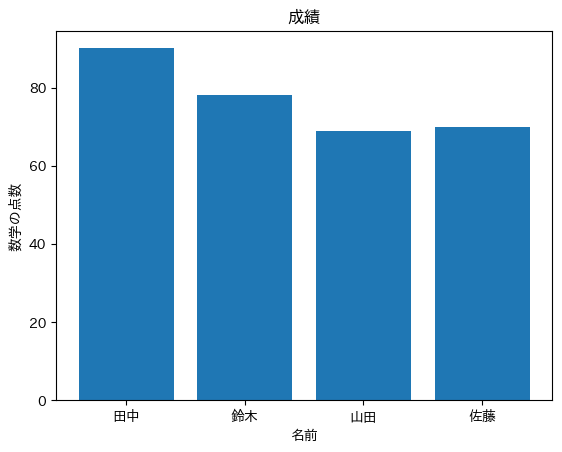

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントの使用
name  = ["田中", "鈴木", "山田", "佐藤"]
math  = [90, 78, 69, 70]  # 数学の点数
plt.title("成績")   # グラフのタイトル
plt.xlabel("名前")  # X軸のラベル
plt.ylabel("数学の点数")  # y軸のラベル
plt.bar(name, math)       # 棒グラフの作成
plt.show()   # グラフを表示

### 6.3.2　棒グラフ（複数）

In [ ]:
import matplotlib.colors as mcolors
print(mcolors.TABLEAU_COLORS)

{'tab:blue': '#1f77b4', 'tab:orange': '#ff7f0e', 'tab:green': '#2ca02c', 'tab:red': '#d62728', 'tab:purple': '#9467bd', 'tab:brown': '#8c564b', 'tab:pink': '#e377c2', 'tab:gray': '#7f7f7f', 'tab:olive': '#bcbd22', 'tab:cyan': '#17becf'}


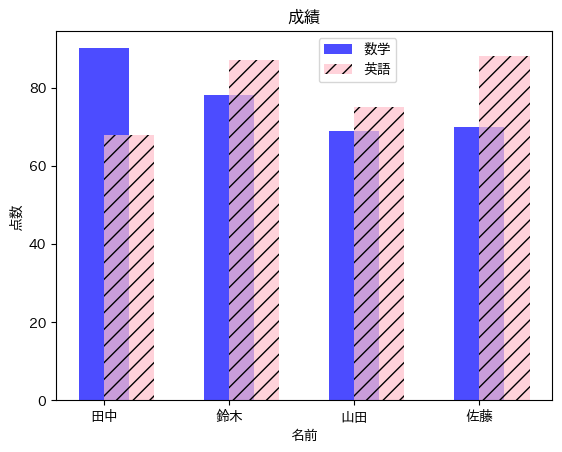

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントの使用
name = ["田中", "鈴木", "山田", "佐藤"]
math = [90, 78, 69, 70]  # 数学の点数
eng  = [68, 87, 75, 88]  # 英語の点数
plt.title("成績")
plt.xlabel("名前")  # X軸のラベル
plt.ylabel("点数")  # Y軸のラベル
bar_width = 0.4     # 棒の幅
c1, c2 = "blue", "pink"  # グラフの色
# 棒グラフを描画（数学は左寄せ、英語は中央寄せ）
plt.bar(name, math, color=c1, width=bar_width, label="数学", alpha=0.7, align="center")
plt.bar(name, eng, color=c2, width=bar_width, label="英語", alpha=0.7, align="edge", hatch="//")
plt.legend(bbox_to_anchor=(0.7, 1))  # 凡例を表示
plt.show()    # グラフを表示

### 6.3.3　円グラフ

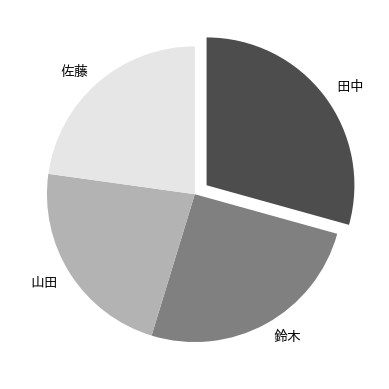

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントの使用
import numpy as np          # NumPyをインポート
name = ["田中", "鈴木", "山田", "佐藤"]
math = [90, 78, 69, 70]     # 数学の点数
gray = [str(c) for c in np.linspace(0.3, 0.9, len(math))]
explode = [0.1, 0, 0, 0]    # 「田中」だけ強調
plt.pie(math, labels=name, colors=gray, startangle=90, counterclock=False, explode=explode)
plt.show()  # グラフを表示

### 6.3.4　散布図

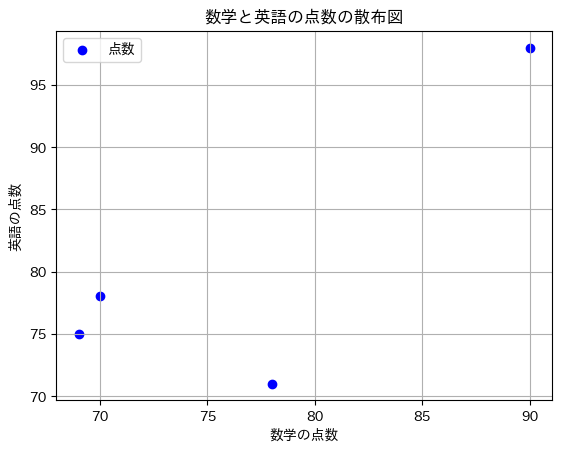

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントの使用
math = [90, 78, 69, 70]   # 数学の点数
eng  = [98, 71, 75, 78]   # 英語の点数
plt.scatter(math, eng, marker="o", color="blue", label="点数")
plt.xlabel("数学の点数")  # 軸ラベル
plt.ylabel("英語の点数")  # 軸ラベル
plt.grid(True)            # グリッド線を追加
plt.legend()              # 凡例を追加
plt.title("数学と英語の点数の散布図")  # タイトルを追加
plt.show()      # グラフを表示

### 6.3.5　折れ線グラフ

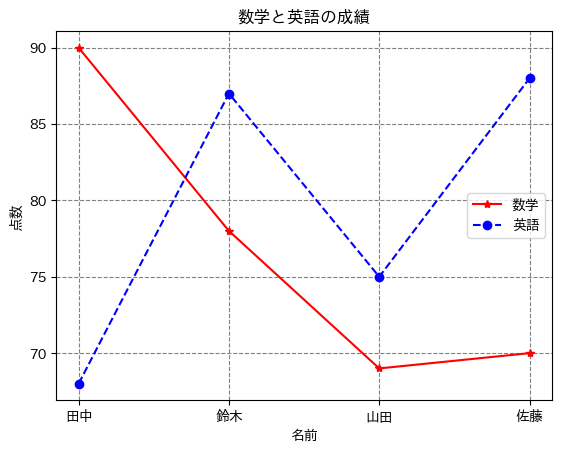

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントの使用
math = [90, 78, 69, 70]     # 数学の点数
eng  = [68, 87, 75, 88]     # 英語の点数
st = ["田中", "鈴木", "山田", "佐藤"]  # 学生の名前
plt.plot(st, math, marker="*", color="red", label="数学")
plt.plot(st, eng, marker="o", color="blue", linestyle="--", label="英語")
plt.xlabel("名前")  # 軸ラベルの設定
plt.ylabel("点数")  # 軸ラベルの設定
plt.title("数学と英語の成績")  # グラフのタイトル
plt.legend()    # 凡例（ラベル）を表示
plt.grid(True, linestyle="--", color="gray")  # グリッド線
plt.show()      # グラフを表示

### 6.3.6　ヒストグラム

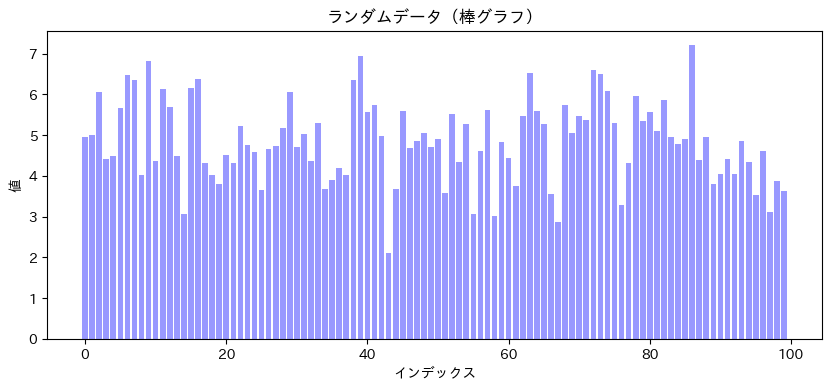

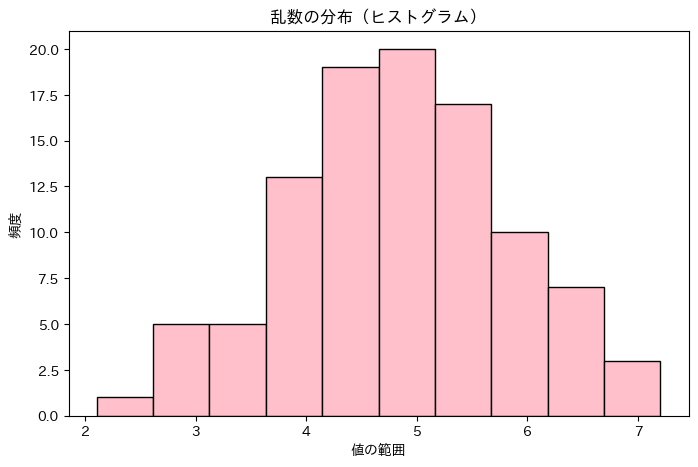

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# 5付近の乱数を100個作成（平均5、標準偏差1の正規分布）
r = 5 + np.random.randn(100)
x = np.arange(len(r))        # 0～99のリストを作成
plt.figure(figsize=(10, 4))  # グラフのサイズを調整
plt.bar(x, r, color="blue", alpha=0.4)  # 棒グラフ
plt.xlabel("インデックス")
plt.ylabel("値")
plt.title("ランダムデータ（棒グラフ）")
plt.show()   # グラフを表示
plt.figure(figsize=(8, 5))  # ヒストグラムのサイズを調整
plt.hist(r, bins=10, color="pink", edgecolor="black")
plt.xlabel("値の範囲")
plt.ylabel("頻度")
plt.title("乱数の分布（ヒストグラム）")
plt.show()   # グラフを表示